# Kaggle Data : Life Expectancy

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib  as mpl

mpl.rc('font', family = 'Malgun Gothic')
mpl.rc('axes', unicode_minus = False) # unicode의 음수부호 설정 false

In [13]:
life = pd.read_csv('data/life_expectancy.csv')
life.head(5)

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [14]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [15]:
life = life[['Life expectancy', 'Year', 'Alcohol',
             'Percentage expenditure', 'Total expenditure',
             'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP',
             'Thinness 1-19 years', 'Thinness 5-9 years']]


In [16]:
print(life.shape)
life.isnull().sum()

(2938, 12)


Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64

In [20]:
life[life['Life expectancy'].isnull()]

,Life expectancy,Year,Alcohol,Percentage expenditure,Total expenditure,Hepatitis B,Measles,Polio,BMI,GDP,Thinness 1-19 years,Thinness 5-9 years
624,NaN,2013,0.01,0.000000,3.58,98.0,0,98.0,82.8,NaN,0.1,0.1
769,NaN,2013,0.01,11.419555,5.58,96.0,0,96.0,58.4,722.756650,2.7,2.6
1650,NaN,2013,0.01,871.878317,17.24,8.0,0,79.0,81.6,3617.752354,0.1,0.1
1715,NaN,2013,0.01,0.000000,4.30,99.0,0,99.0,NaN,NaN,NaN,NaN
1812,NaN,2013,0.01,15.606596,4.65,87.0,0,87.0,87.3,136.183210,0.1,0.1
1909,NaN,2013,0.01,0.000000,7.20,99.0,0,99.0,77.3,NaN,0.1,0.1
1958,NaN,2013,NaN,344.690631,9.27,99.0,0,99.0,83.3,1932.122370,0.1,0.1
2167,NaN,2013,8.54,0.000000,6.14,97.0,0,96.0,5.2,NaN,3.7,3.6
2216,NaN,2013,0.01,0.000000,6.50,69.0,0,69.0,NaN,NaN,NaN,NaN
2713,NaN,2013,0.01,78.281203,16.61,9.0,0,9.0,79.3,3542.135890,0.2,0.1


In [23]:
# NaN이 하나라도 있는 행 삭제
life.dropna(inplace=True)
life

,Life expectancy,Year,Alcohol,Percentage expenditure,Total expenditure,Hepatitis B,Measles,Polio,BMI,GDP,Thinness 1-19 years,Thinness 5-9 years
0,65.0,2015,0.01,71.279624,8.16,65.0,1154,6.0,19.1,584.259210,17.2,17.3
1,59.9,2014,0.01,73.523582,8.18,62.0,492,58.0,18.6,612.696514,17.5,17.5
2,59.9,2013,0.01,73.219243,8.13,64.0,430,62.0,18.1,631.744976,17.7,17.7
3,59.5,2012,0.01,78.184215,8.52,67.0,2787,67.0,17.6,669.959000,17.9,18.0
4,59.2,2011,0.01,7.097109,7.87,68.0,3013,68.0,17.2,63.537231,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,2004,4.36,0.000000,7.13,68.0,31,67.0,27.1,454.366654,9.4,9.4
2934,44.5,2003,4.06,0.000000,6.52,7.0,998,7.0,26.7,453.351155,9.8,9.9
2935,44.8,2002,4.43,0.000000,6.53,73.0,304,73.0,26.3,57.348340,1.2,1.3
2936,45.3,2001,1.72,0.000000,6.16,76.0,529,76.0,25.9,548.587312,1.6,1.7


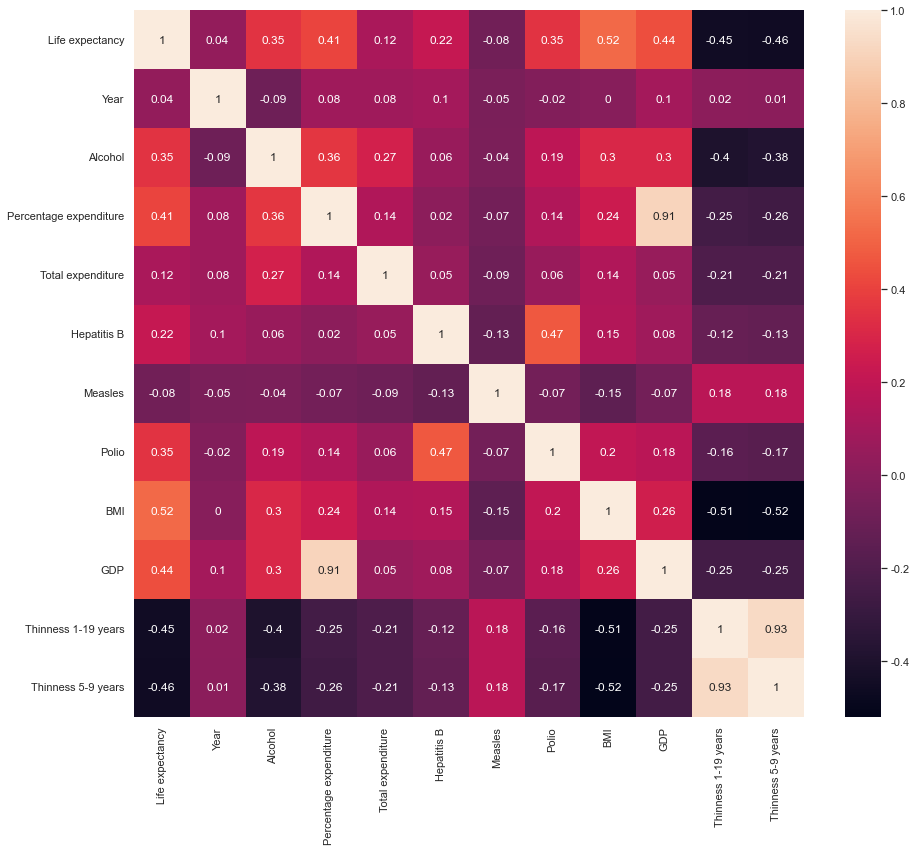

In [27]:
# hitmap 그리기 
import seaborn as sns

sns.set(rc={'figure.figsize':(15,13)})    # 상관행렬 가시
correlation_matrix = life.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


In [25]:
correlation_matrix

,Life expectancy,Year,Alcohol,Percentage expenditure,Total expenditure,Hepatitis B,Measles,Polio,BMI,GDP,Thinness 1-19 years,Thinness 5-9 years
Life expectancy,1.00,0.04,0.35,0.41,0.12,0.22,-0.08,0.35,0.52,0.44,-0.45,-0.46
Year,0.04,1.00,-0.09,0.08,0.08,0.10,-0.05,-0.02,0.00,0.10,0.02,0.01
Alcohol,0.35,-0.09,1.00,0.36,0.27,0.06,-0.04,0.19,0.30,0.30,-0.40,-0.38
Percentage expenditure,0.41,0.08,0.36,1.00,0.14,0.02,-0.07,0.14,0.24,0.91,-0.25,-0.26
Total expenditure,0.12,0.08,0.27,0.14,1.00,0.05,-0.09,0.06,0.14,0.05,-0.21,-0.21
Hepatitis B,0.22,0.10,0.06,0.02,0.05,1.00,-0.13,0.47,0.15,0.08,-0.12,-0.13
Measles,-0.08,-0.05,-0.04,-0.07,-0.09,-0.13,1.00,-0.07,-0.15,-0.07,0.18,0.18
Polio,0.35,-0.02,0.19,0.14,0.06,0.47,-0.07,1.00,0.20,0.18,-0.16,-0.17
BMI,0.52,0.00,0.30,0.24,0.14,0.15,-0.15,0.20,1.00,0.26,-0.51,-0.52
GDP,0.44,0.10,0.30,0.91,0.05,0.08,-0.07,0.18,0.26,1.00,-0.25,-0.25


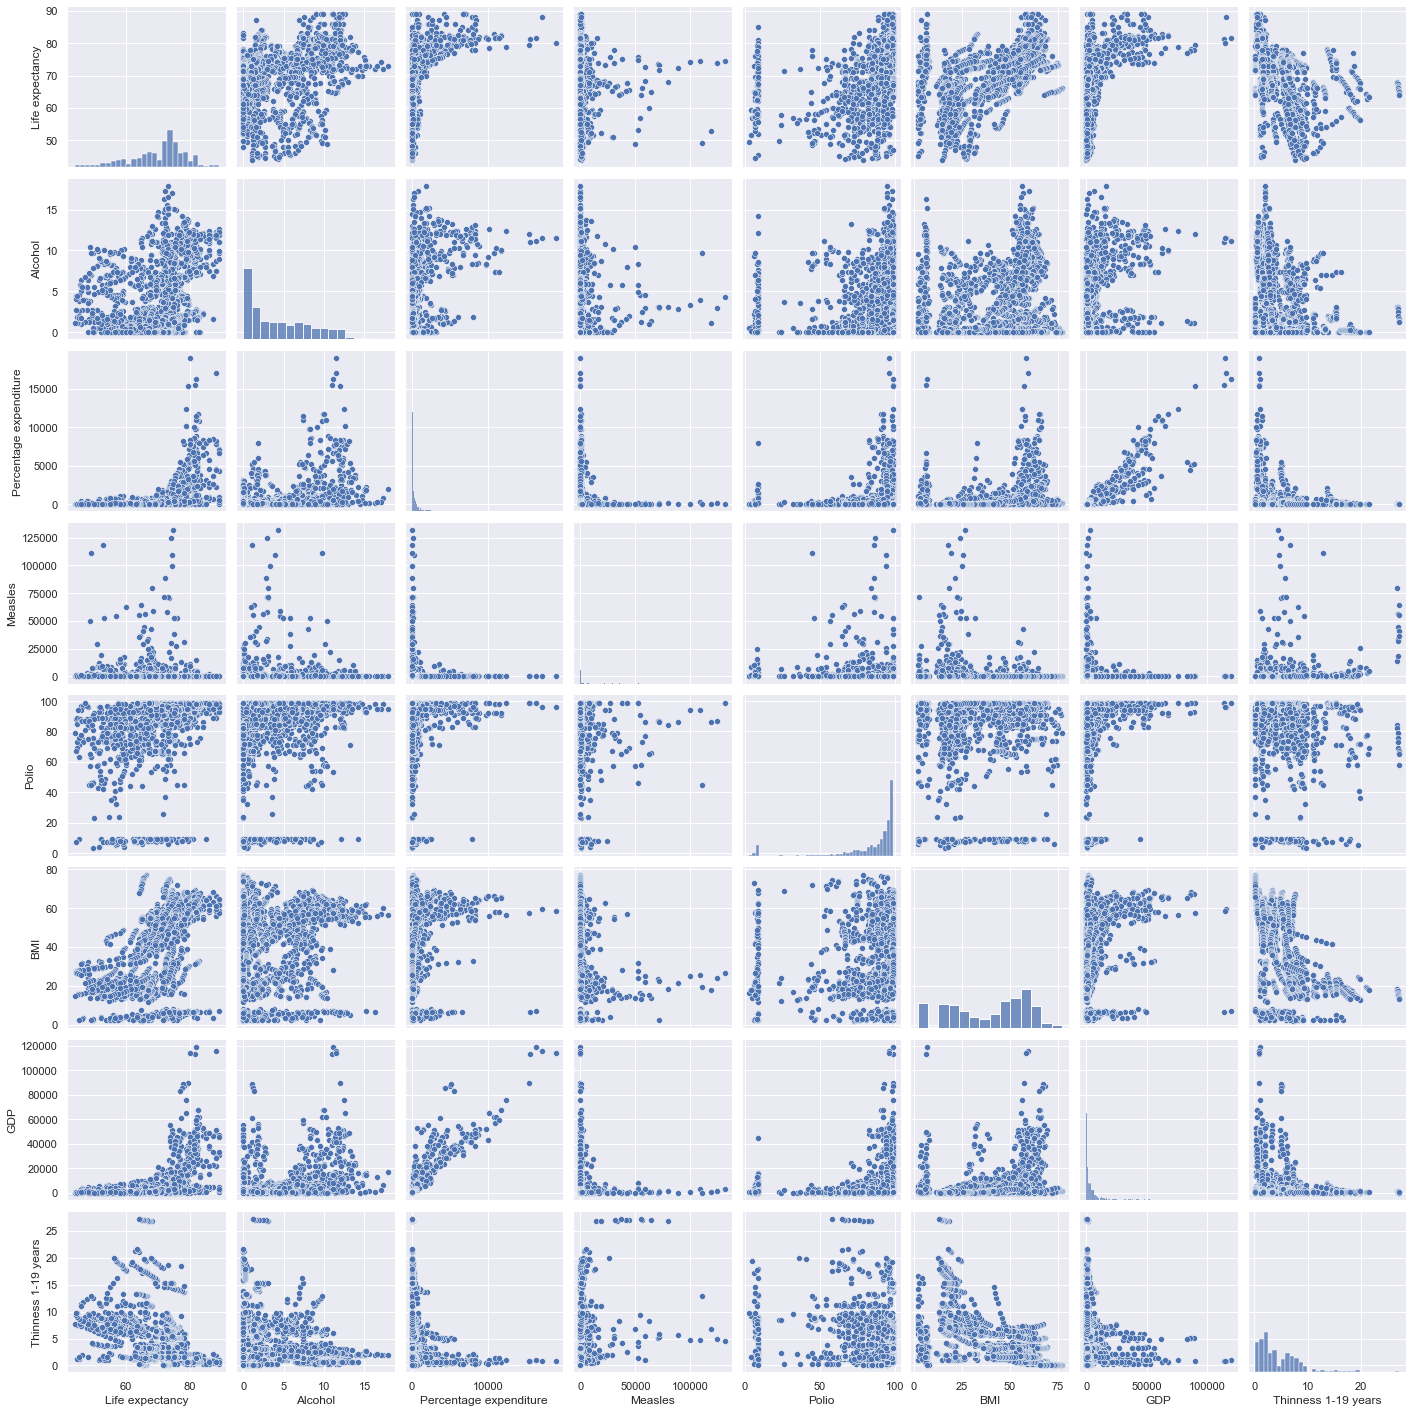

In [28]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()


In [29]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
X

,Alcohol,Percentage expenditure,Polio,BMI,GDP,Thinness 1-19 years
0,0.01,71.279624,6.0,19.1,584.259210,17.2
1,0.01,73.523582,58.0,18.6,612.696514,17.5
2,0.01,73.219243,62.0,18.1,631.744976,17.7
3,0.01,78.184215,67.0,17.6,669.959000,17.9
4,0.01,7.097109,68.0,17.2,63.537231,18.2
...,...,...,...,...,...,...
2933,4.36,0.000000,67.0,27.1,454.366654,9.4
2934,4.06,0.000000,7.0,26.7,453.351155,9.8
2935,4.43,0.000000,73.0,26.3,57.348340,1.2
2936,1.72,0.000000,76.0,25.9,548.587312,1.6


## 데이터 분할

In [31]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

life = pd.read_csv('data/life_expectancy.csv')
life.dropna(inplace=True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X.shape, X_train.shape, X_test.shape, Y_train.shape

((1649, 6), (1319, 6), (330, 6), (1319,))

In [34]:
X.shape[0] * 0.2

329.8

In [37]:
from sklearn.linear_model import LinearRegression 
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [40]:
Y_hat_test = lin_model.predict(X_test)
Y_hat_test.shape

(330,)

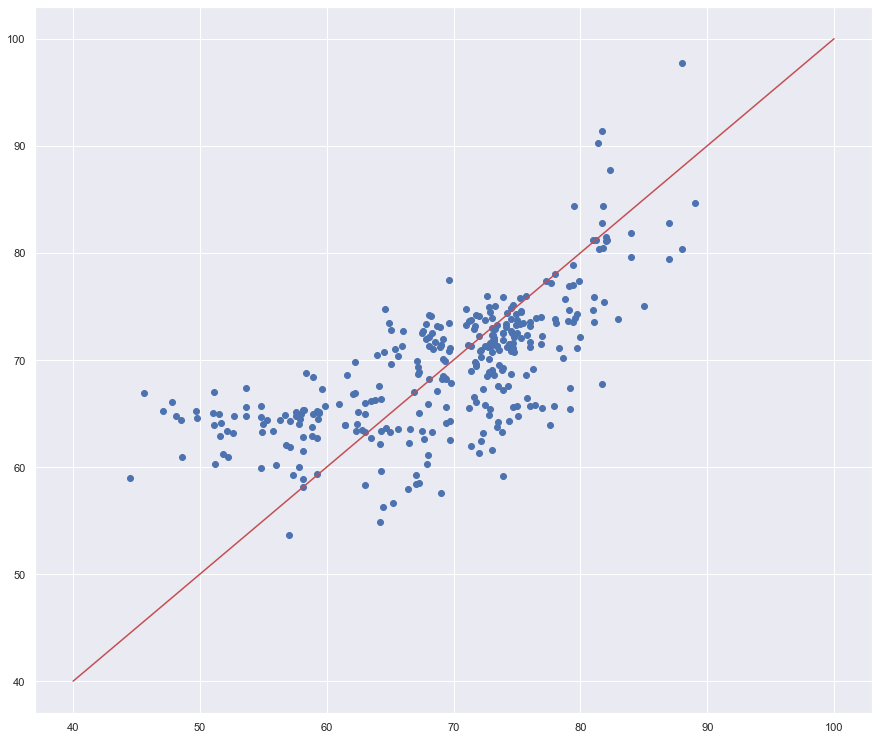

In [43]:
plt.scatter(Y_test, Y_hat_test)
xy_range = [40, 100]
plt.plot(xy_range, xy_range, 'r')
plt.show()

In [47]:
lin_model.coef_

array([ 1.09857686e-01, -3.21918794e-04,  8.00082805e-02,  1.43507617e-01,
        2.50712813e-04, -2.93606498e-01])

In [48]:
lin_model.intercept_

56.924127074939335

In [49]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test, Y_hat_test)

41.25658162019577

In [50]:
X

,Alcohol,Percentage expenditure,Polio,BMI,GDP,Thinness 1-19 years
0,0.01,71.279624,6.0,19.1,584.259210,17.2
1,0.01,73.523582,58.0,18.6,612.696514,17.5
2,0.01,73.219243,62.0,18.1,631.744976,17.7
3,0.01,78.184215,67.0,17.6,669.959000,17.9
4,0.01,7.097109,68.0,17.2,63.537231,18.2
...,...,...,...,...,...,...
2933,4.36,0.000000,67.0,27.1,454.366654,9.4
2934,4.06,0.000000,7.0,26.7,453.351155,9.8
2935,4.43,0.000000,73.0,26.3,57.348340,1.2
2936,1.72,0.000000,76.0,25.9,548.587312,1.6


## 데이터 정제

In [51]:
from sklearn.preprocessing import normalize 

n_X = normalize(X, axis=0)

In [52]:
(life.Alcohol - life.Alcohol.min()) / (life.Alcohol.max() - life.Alcohol.min())

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2933    0.243561
2934    0.226764
2935    0.247480
2936    0.095745
2937    0.093505
Name: Alcohol, Length: 1649, dtype: float64

In [54]:
nX_train, nX_test, y_train, y_test = train_test_split(n_X, y, test_size=0.2)
lin_model.fit(nX_train, y_train)

LinearRegression()

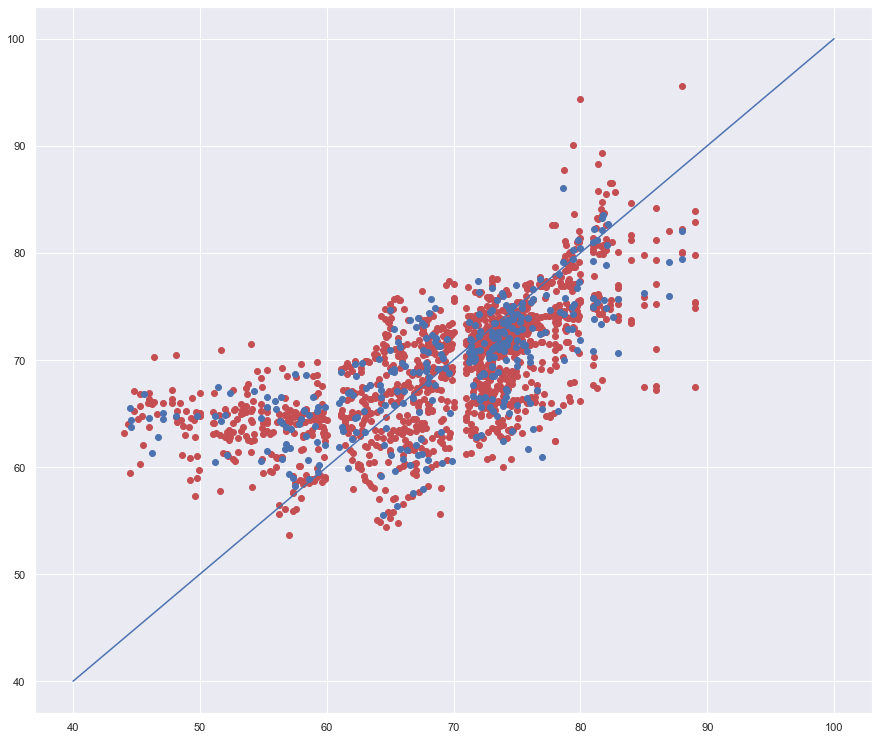

In [56]:
y_hat_train = lin_model.predict(nX_train)
y_hat_test = lin_model.predict(nX_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)
plt.show()

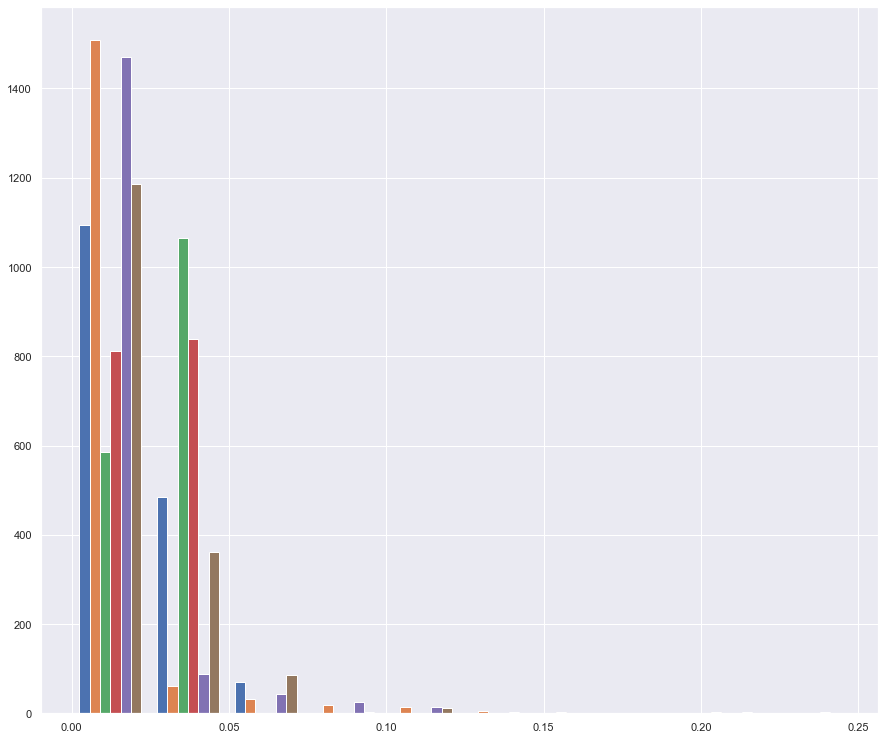

In [60]:
plt.hist(n_X, bins=10)
plt.show()

(array([[ 515., 1092.,   42.,    0.,    0.],
        [   0., 1574.,   60.,   10.,    5.],
        [ 189., 1460.,    0.,    0.,    0.],
        [ 486., 1163.,    0.,    0.,    0.],
        [   0., 1566.,   72.,    7.,    4.],
        [ 281., 1274.,   85.,    9.,    0.]]),
 array([-3.5896224 , -0.7948891 ,  1.99984419,  4.79457749,  7.58931078,
        10.38404408]),
 <a list of 6 BarContainer objects>)

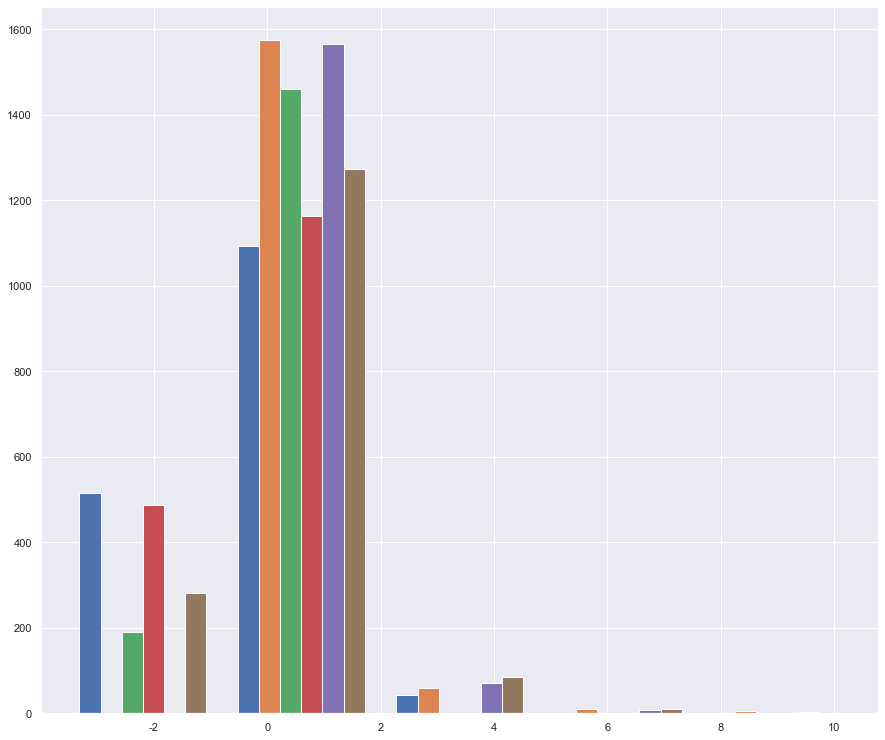

In [63]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
s_X = scaler.fit_transform(X)

plt.hist(s_X, bins=5)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sX_train = scaler.fit_transform(X_train)
sX_test = scaler.fit_transform(X_test)

lin_model.fit(sX_train, y_train)

LinearRegression()

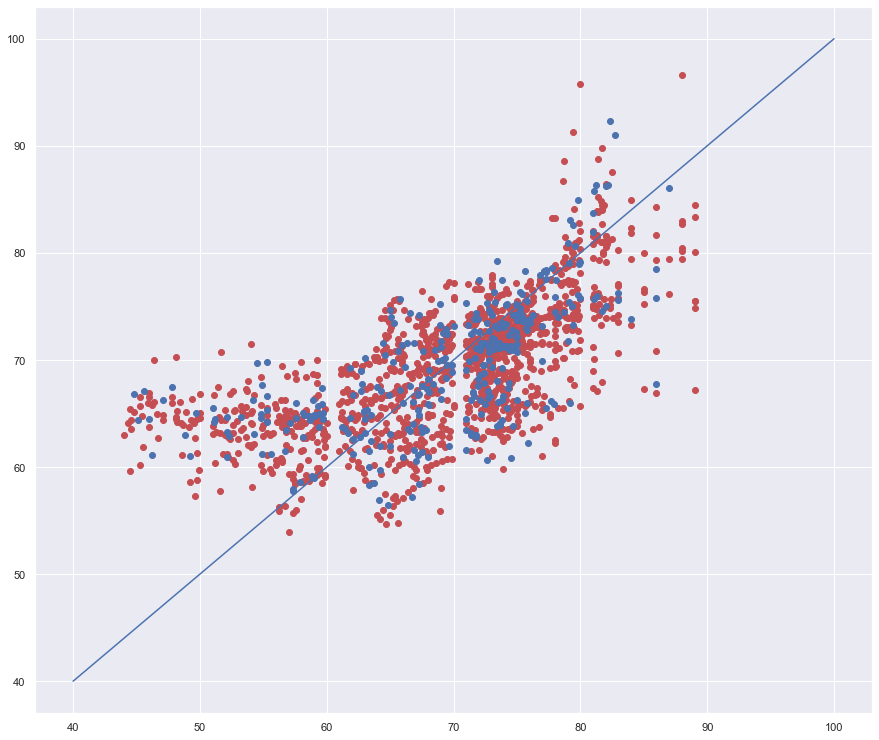

In [67]:
y_hat_train = lin_model.predict(sX_train)
y_hat_test = lin_model.predict(sX_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot(xy_range, xy_range)
plt.show()